In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import matplotlib as mpl

mpl.rcParams['xtick.major.pad'] = 1
mpl.rcParams['ytick.major.pad'] = 1

mpl.rcParams['xtick.major.size'] = 2  # Major tick length for x-axis
mpl.rcParams['xtick.minor.size'] = 0.5   # Minor tick length for x-axis
mpl.rcParams['ytick.major.size'] = 2  # Major tick length for y-axis
mpl.rcParams['ytick.minor.size'] = 0.5   # Minor tick length for y-axis

mpl.rcParams['xtick.major.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.major.width'] = 0.375  # Major tick width for y-axis
mpl.rcParams['xtick.minor.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.minor.width'] = 0.375  # Major tick width for y-axis


	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.375

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)


In [14]:
batch_sizes = []
times_mps = []
for b in range(50,500,50):
    x=np.loadtxt(f'benchmarking_runs/batch_size_mps/runtime_matrix_30_steps_mps_{b}_batchsize_compile_off.csv',delimiter=',')
    batch_sizes.append(b)
    times_mps.append(x[1])

batch_sizes = []
times_cpu = []
for b in range(50,500,50):
    x=np.loadtxt(f'benchmarking_runs/batch_size_cpu/runtime_matrix_30_steps_cpu_{b}_batchsize_compile_off.csv',delimiter=',')
    batch_sizes.append(b)
    times_cpu.append(x[1])    

batch_sizes_cuda = []
times_cuda = []
for b in range(20,240,20):
    x=np.loadtxt(f'benchmarking_runs/batch_size_cuda/runtime_matrix_30_steps_cuda_{b}_batchsize_compile_off.csv',delimiter=',')
    batch_sizes_cuda.append(b)
    times_cuda.append(x[1])        

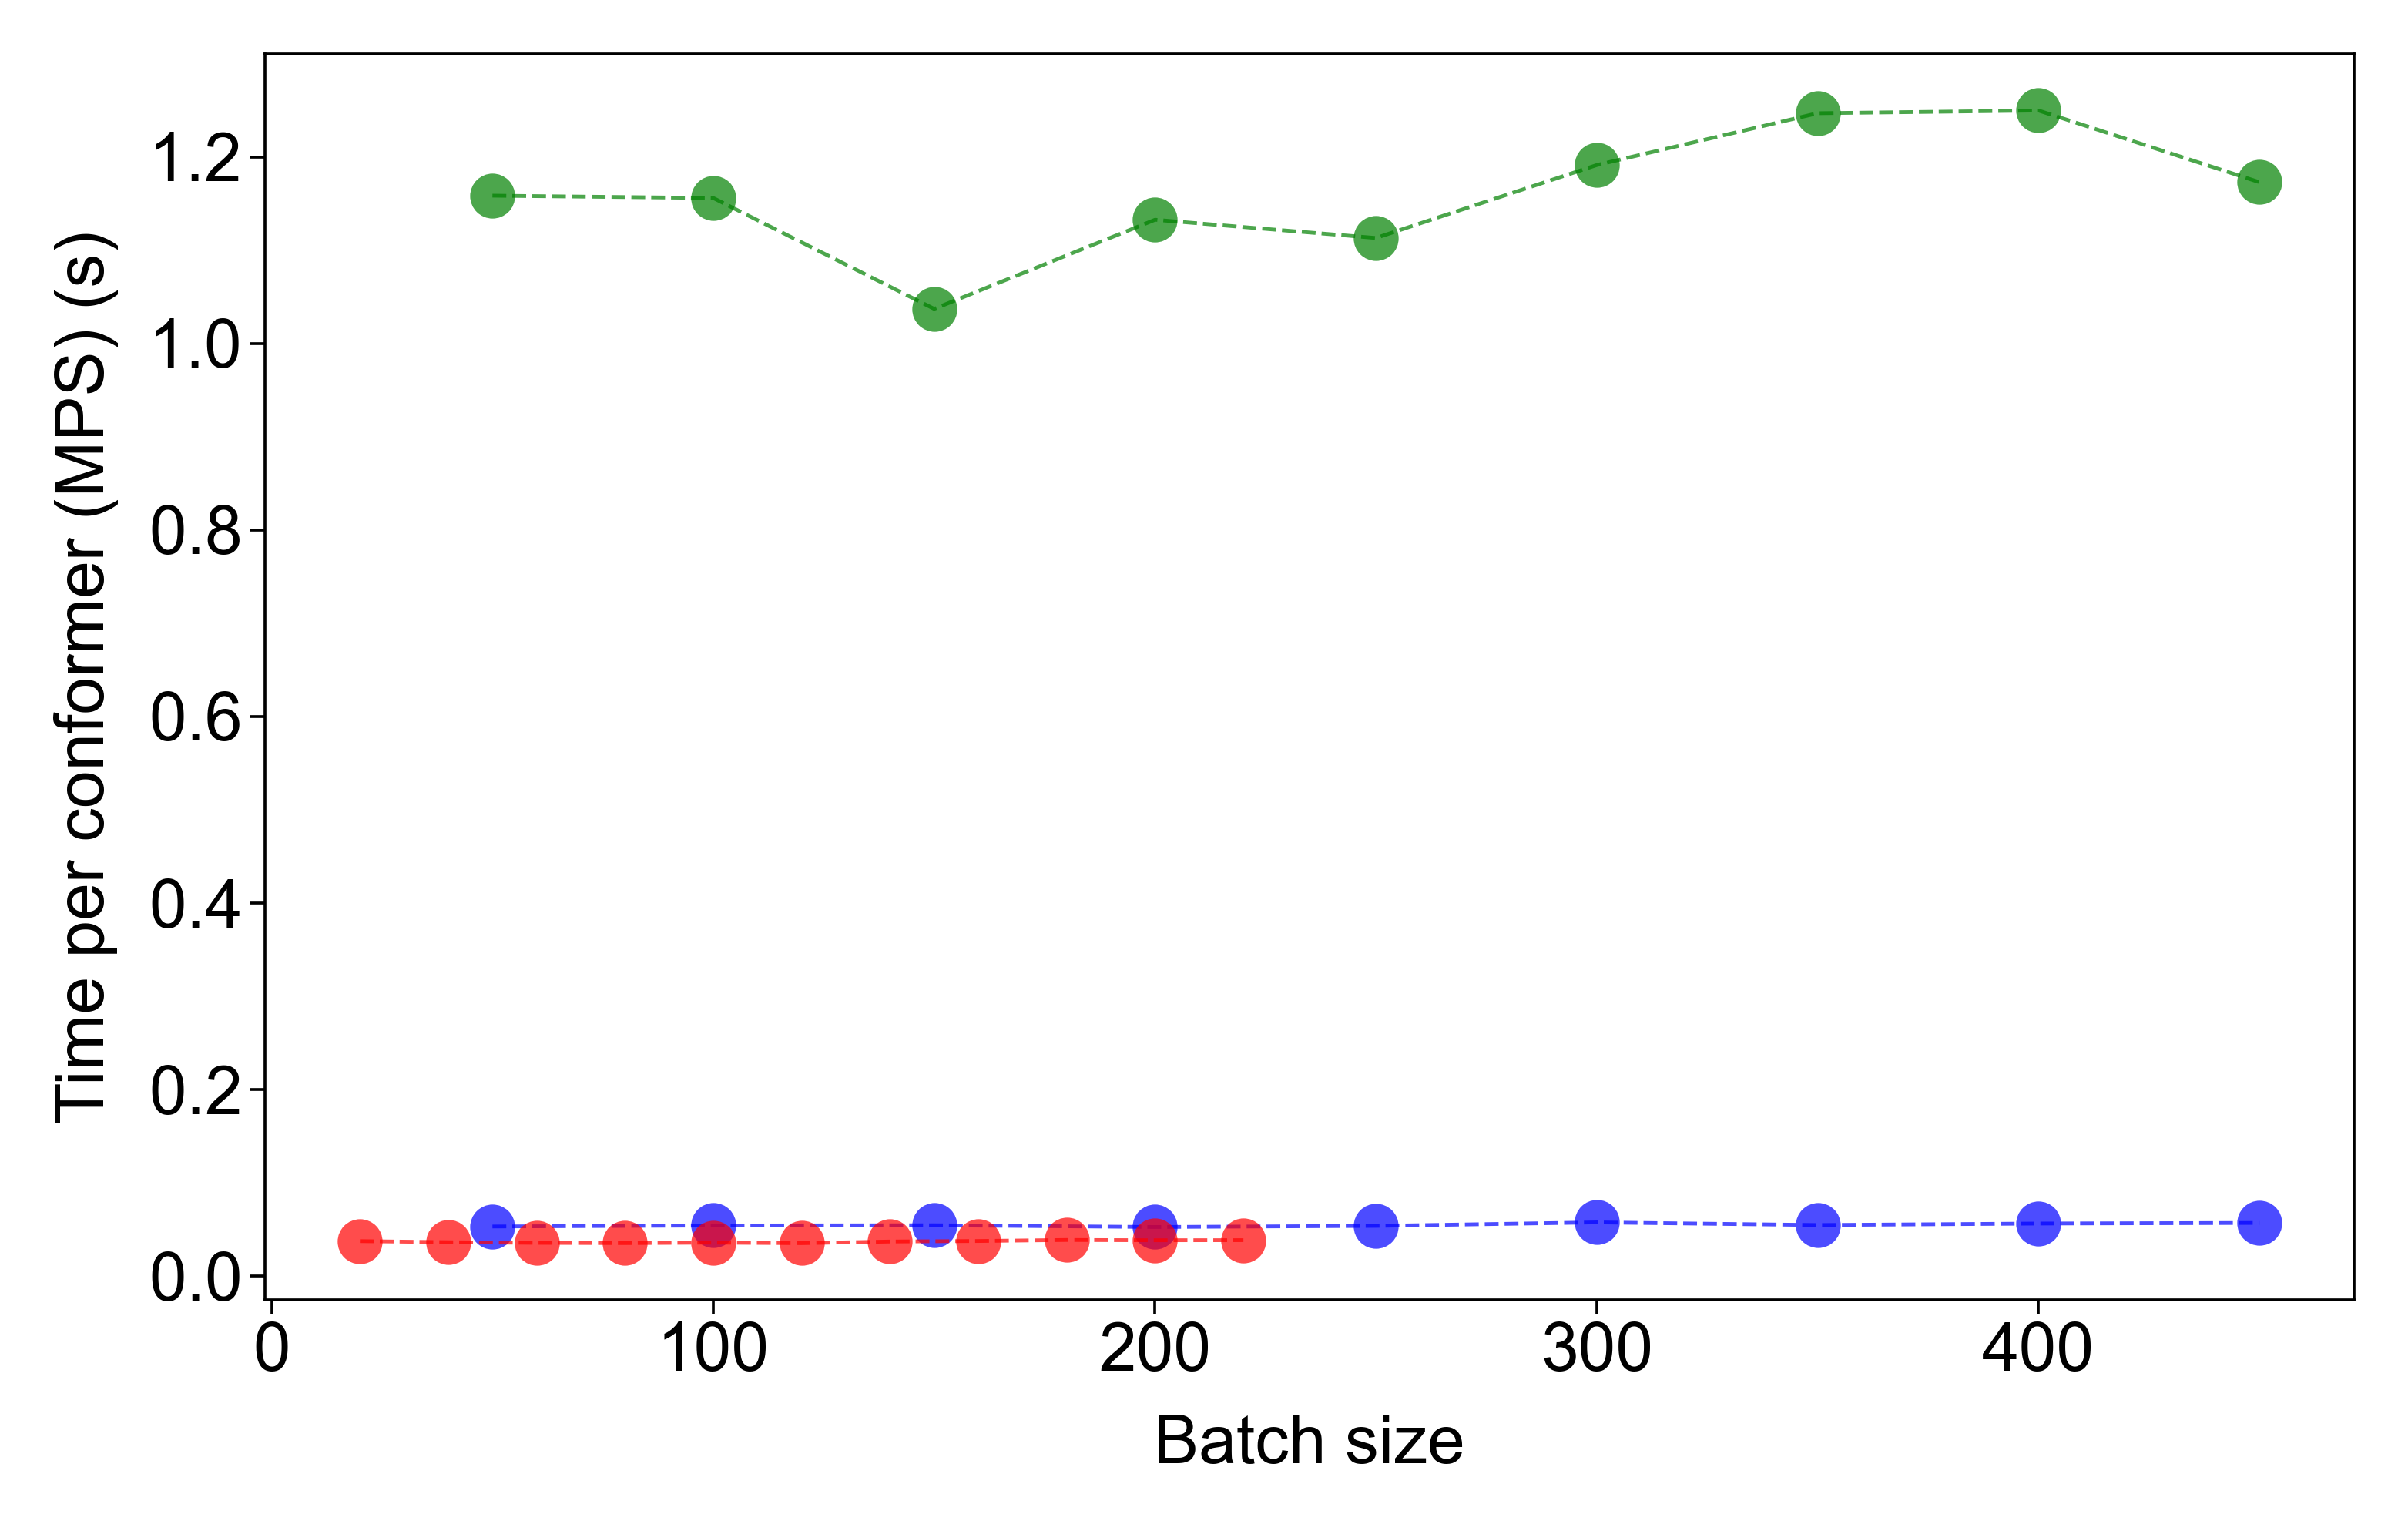

In [18]:
figure(None, (5,3), dpi=350)
LOGSPACE = False
ax = plt.gca()

plt.plot(batch_sizes, np.array(times_mps)/500, '--o', color='b', alpha=0.7, mew=0, lw=0.5)
plt.plot(batch_sizes, np.array(times_cpu)/500, '--o', color='g', alpha=0.7, mew=0, lw=0.5)
plt.plot(batch_sizes_cuda, np.array(times_cuda)/500, '--o', color='r', alpha=0.7, mew=0, lw=0.5)
        
#plt.ylim([0,0.1])
plt.ylabel('Time per conformer (MPS) (s)',fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Batch size',fontsize=9)
plt.xticks(fontsize=9)


if LOGSPACE:
    plt.yscale('log')
    plt.savefig('figures/time_per_conf_vs_batchsize_log.pdf')
else:
    plt.savefig('figures/time_per_conf_vs_batchsize.pdf')
    
